**Predicting the peak particle velocity of the blasts which occur in Coal Mines**



**variables involved in the data**
*No. of holes 
Hole. dia.(mm)
Hole depth(m)
Burden(m)
Spacing(m)
Top stemming(m)
Avg. Explosive Per hole(kg)
Distance(m)
PPV (mm/s)*


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.imports import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/SASAN.xlsx


In [2]:
data = pd.read_excel('/kaggle/input/SASAN.xlsx')
data

,No. of holes,Hole. dia.(mm),Hole depth(m),Burden(m),Spacing(m),Top stemming(m),Avg. Explosive Per hole(kg),Distance(m),PPV (mm/s)
0,259,30,19.0,8,10,8.0,507.0,180.0,20.90
1,259,36,15.5,8,10,5.5,494.0,200.0,20.50
2,259,45,15.5,8,10,5.7,480.0,975.0,3.25
3,259,67,16.5,8,10,5.0,563.0,150.0,36.30
4,311,225,54.0,10,13,7.0,4365.0,2500.0,20.50
...,...,...,...,...,...,...,...,...,...
116,159,52,52.0,8,10,6.0,200.0,100.0,1.37
117,159,52,52.0,8,10,6.0,200.0,150.0,1.20
118,159,20,20.0,8,10,6.0,235.0,75.0,34.00
119,159,20,20.0,8,10,6.0,235.0,100.0,32.90


In [3]:
data.rename(columns = {'PPV (mm/s)':'PPV'}, inplace = True) 
y=data.PPV

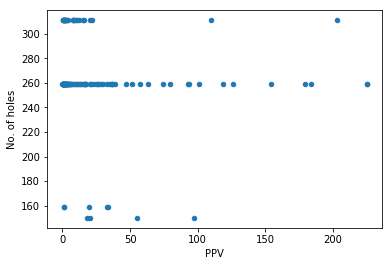

In [4]:
d= pd.concat([data['No. of holes'], data['PPV']], axis=1)
d.plot.scatter(x='PPV', y='No. of holes');

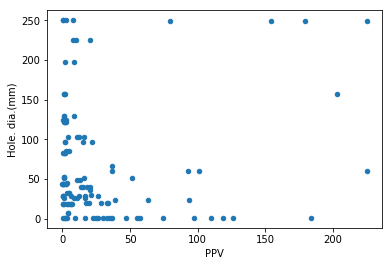

In [5]:
d= pd.concat([data['Hole. dia.(mm)'], data['PPV']], axis=1)
d.plot.scatter(x='PPV', y='Hole. dia.(mm)');

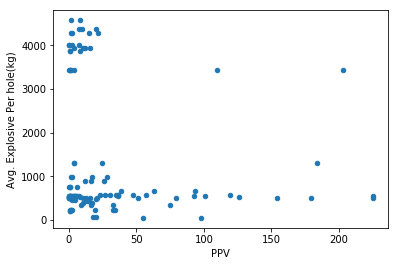

In [6]:
d= pd.concat([data['Avg. Explosive Per hole(kg)'], data['PPV']], axis=1)
d.plot.scatter(x='PPV', y='Avg. Explosive Per hole(kg)');

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


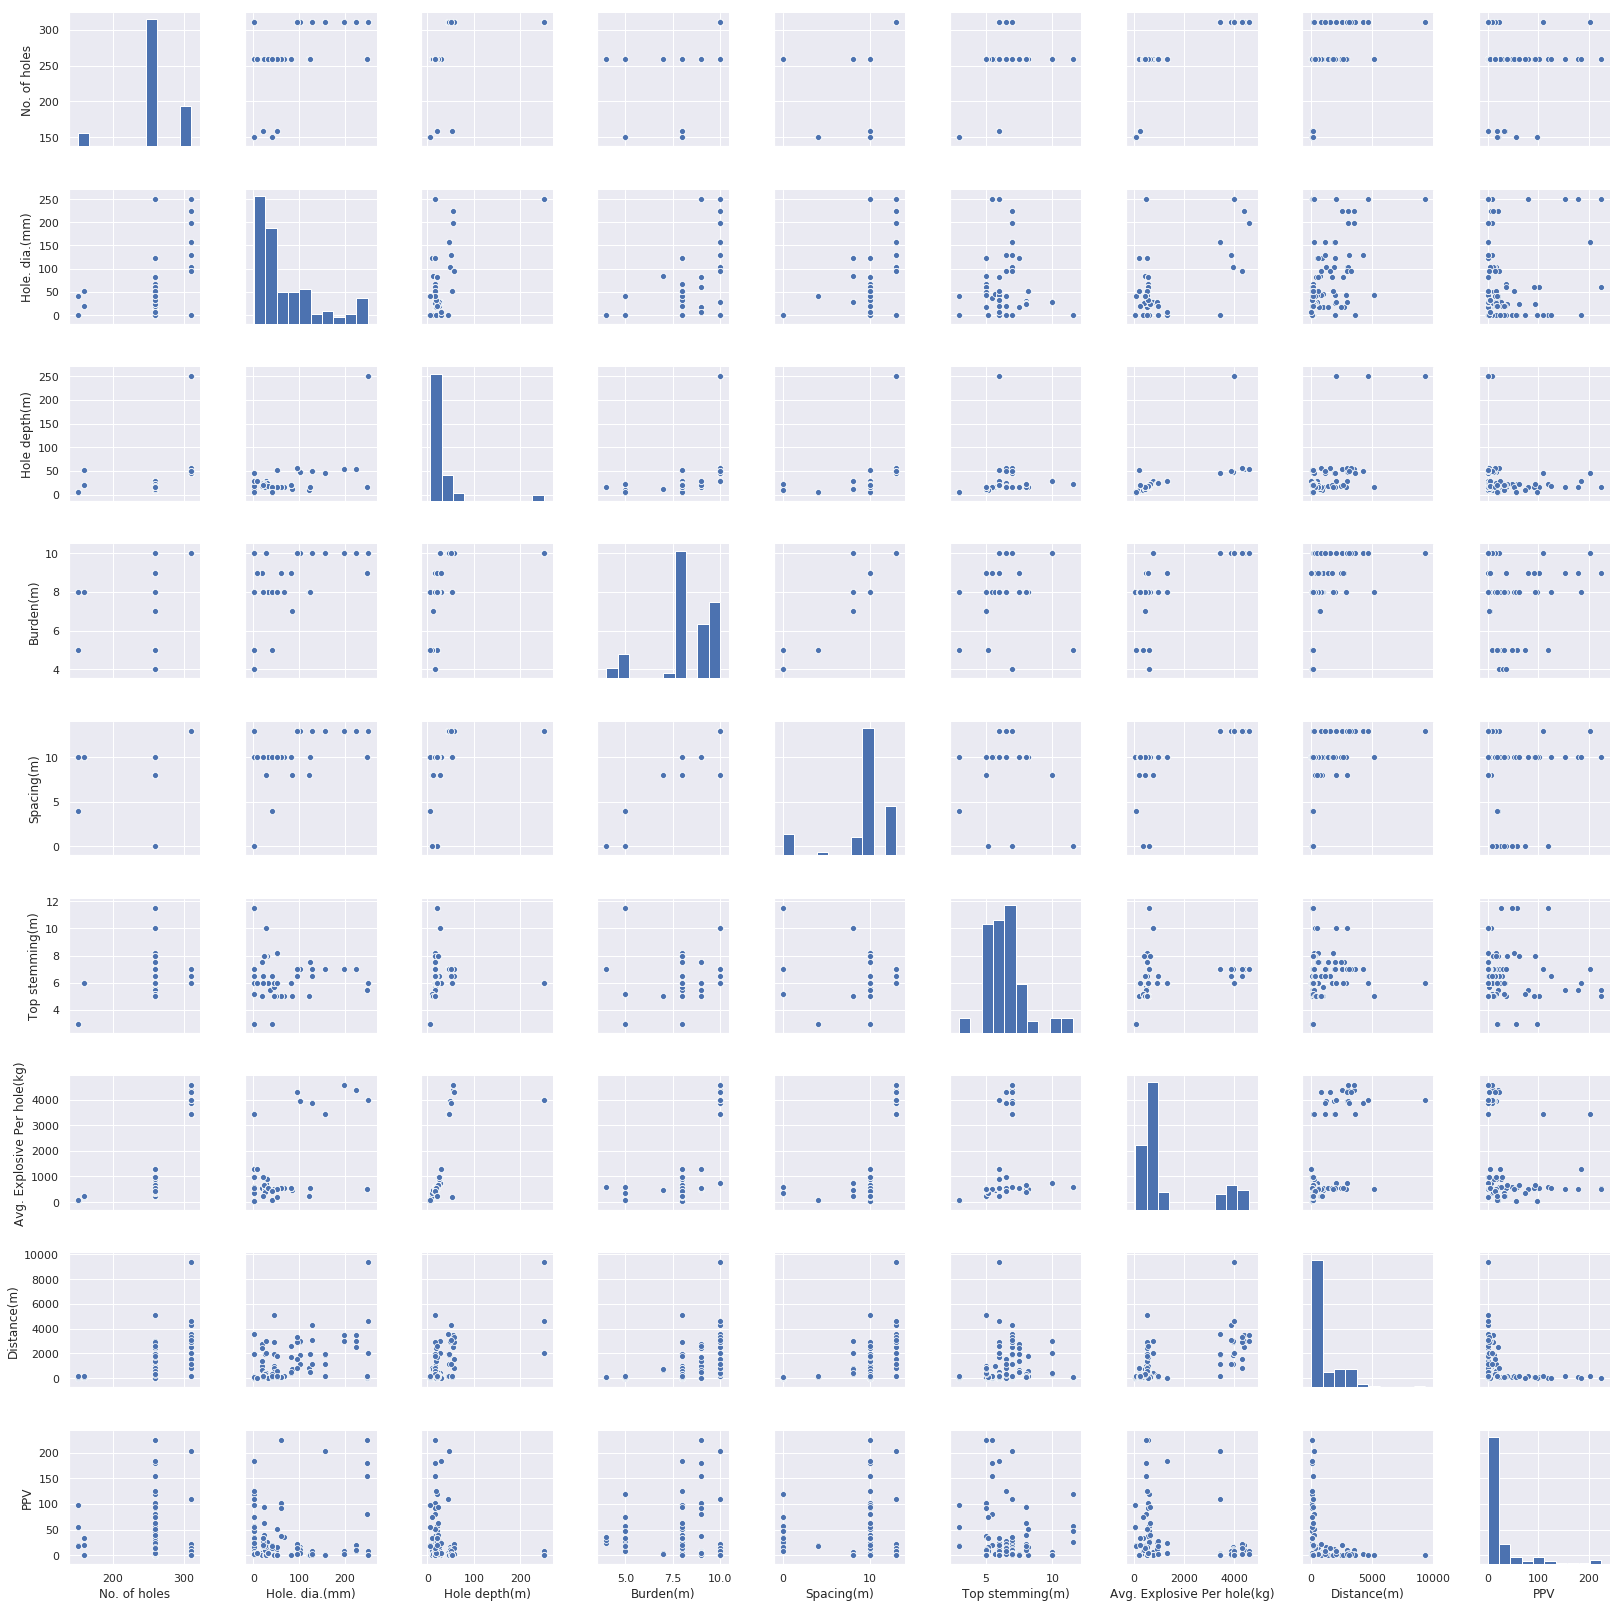

In [7]:
sns.set()
cols = [ 'No. of holes','Hole. dia.(mm)','Hole depth(m)','Burden(m)','Spacing(m)','Top stemming(m)','Avg. Explosive Per hole(kg)','Distance(m)','PPV']
sns.pairplot(data[cols], size = 2.5)
plt.show();

In [16]:
X = data[['No. of holes','Hole. dia.(mm)','Hole depth(m)','Burden(m)','Spacing(m)','Top stemming(m)','Avg. Explosive Per hole(kg)','Distance(m)']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [18]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [19]:
X_train

,No. of holes,Hole. dia.(mm),Hole depth(m),Burden(m),Spacing(m),Top stemming(m),Avg. Explosive Per hole(kg),Distance(m)
73,259,124,16.0,8,10,7.5,530.0,500.0
76,259,51,16.0,8,10,8.2,510.0,200.0
54,311,1,45.0,10,13,7.0,3444.0,150.0
50,259,49,16.0,8,10,5.0,511.0,400.0
49,259,49,16.0,8,10,5.0,511.0,340.0
...,...,...,...,...,...,...,...,...
64,259,28,28.0,10,8,10.0,764.0,2980.0
46,259,26,16.0,8,10,6.0,518.0,1950.0
52,259,44,16.5,8,10,5.0,509.0,800.0
75,259,124,16.0,8,10,7.5,530.0,1950.0


In [20]:
X_test

,No. of holes,Hole. dia.(mm),Hole depth(m),Burden(m),Spacing(m),Top stemming(m),Avg. Explosive Per hole(kg),Distance(m)
65,259,44,16.0,8,10,6.0,520.00,200.0
98,311,96,57.0,10,13,7.0,4286.57,3300.0
80,259,29,24.0,8,10,6.0,900.00,150.0
105,259,40,16.0,8,10,6.5,442.00,268.0
36,259,249,16.0,9,10,5.5,496.00,190.0
78,259,51,16.0,8,10,8.2,510.00,1820.0
81,259,29,24.0,8,10,6.0,900.00,230.0
51,259,44,16.5,8,10,5.0,509.00,750.0
87,259,20,24.0,8,10,6.5,975.00,150.0
95,311,96,57.0,10,13,6.5,4286.57,800.0


In [21]:
y_train

73       2.73
76      51.70
54     110.00
50      11.00
49      13.00
        ...  
64       0.10
46       1.18
52       0.10
75       0.66
117      1.20
Name: PPV, Length: 96, dtype: float64

In [22]:
y_test

65       2.620
98       1.990
80      16.900
105     15.400
36      79.400
78       1.390
81      12.500
51       0.400
87      17.300
95      21.600
29      15.900
118     34.000
2        3.250
56       0.300
74       1.650
67       1.140
114      0.582
90      55.200
60       0.823
30      12.000
35     154.000
17       7.370
112      2.650
71       0.960
13     225.000
Name: PPV, dtype: float64

In [23]:
m = RandomForestRegressor(n_estimators=100,min_samples_leaf=2, n_jobs=-1)
m.fit(X_train,y_train)
print_score(m)

[16.421205252915488, 33.052333775697456, 0.8708261613330699, 0.5986502182655511]
